# Data Exploration Notebook

This purpose of this notebook is purely for exploration of the data in `data/raw` folder

In [1]:
import os

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
!python -m trainer_lib

Running trainer lib with args:
Namespace(fetch_data=False, train=False, model=None)


In [3]:
train = pd.read_csv("../data/raw/carInsurance_train.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

## Data Understanding

The following PDF is included with the data and will serve as the source of truth for our data

In [5]:
from IPython.display import IFrame
IFrame("../data/raw/DSS_DMC_Description.pdf", width=900, height=800)

In [94]:
from IPython.display import IFrame
IFrame("../reports/train_profile.html",width=1200, height=800)

In [ ]:
http://127.0.0.1:8888/lab?token=fc23cd1cc7c7f297fb18669cc717bdabdbbc1e2ef50baae3

In [7]:
!pip install -e .

ERROR: File "setup.py" not found. Directory cannot be installed in editable mode: /app/notebooks


In [3]:
import trainer_lib as cilib

In [101]:
kaggle = cilib.KaggleCarInsuranceDataLoader(save_path="../data/raw/")

/Users/martin/projects/car_insurance_prediction/trainer_lib/data


In [90]:
train = kaggle.get_train_data(return_x_y=False)
train_profiler = cilib.DataProfiler(data=train, report_title='train_data', out_path="../reports/")
train_profiler.profile()

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
test = kaggle.get_test_data(return_x_y=False)
test_profiler = cilib.DataProfiler(data=test, report_title='test_data', out_path="../reports/")
test_profiler.profile()

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Balance', ylabel='Count'>

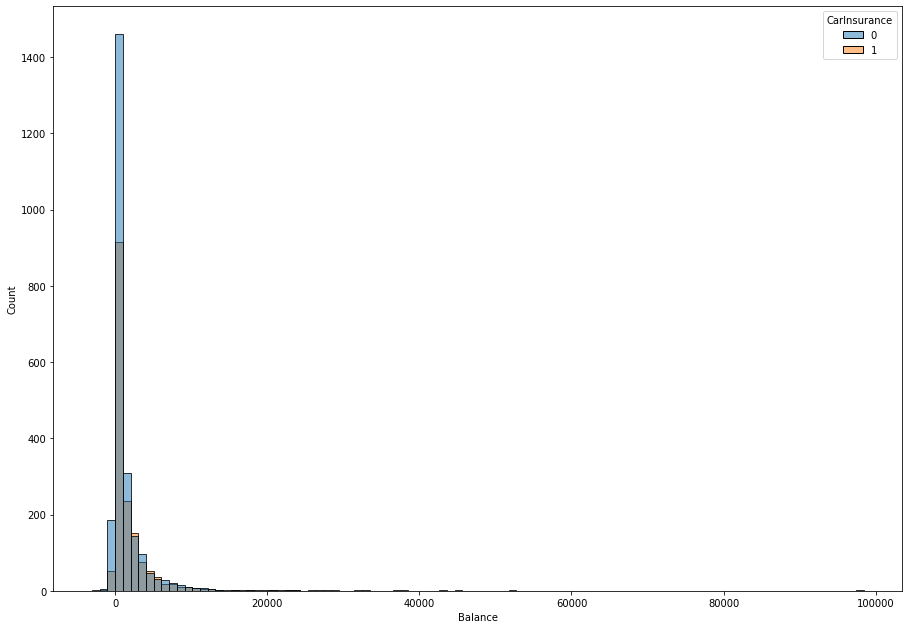

In [18]:
a4_dims = (11.7*1.3, 8.27*1.3)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(train, x="Balance", hue="CarInsurance", bins=100, ax=ax)

In [27]:
train.Balance.mean()

1532.93725

<AxesSubplot:xlabel='Age', ylabel='Count'>

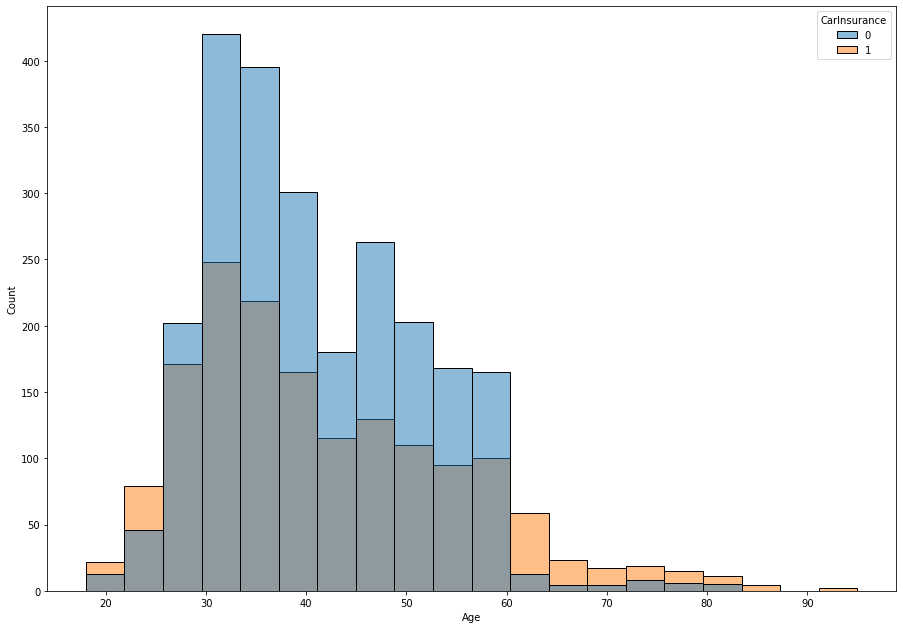

In [21]:
a4_dims = (11.7*1.3, 8.27*1.3)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(train, x="Age", hue="CarInsurance", bins=20, ax=ax)

<AxesSubplot:xlabel='PrevAttempts', ylabel='Count'>

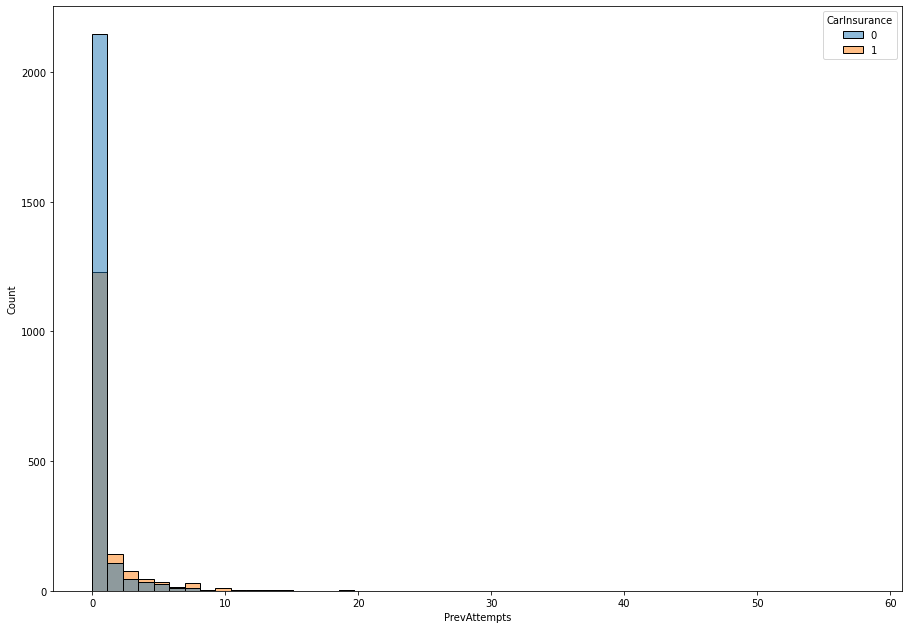

In [24]:
a4_dims = (11.7*1.3, 8.27*1.3)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(train, x="PrevAttempts", hue="CarInsurance", bins=50, ax=ax)

<AxesSubplot:xlabel='DaysPassed', ylabel='Count'>

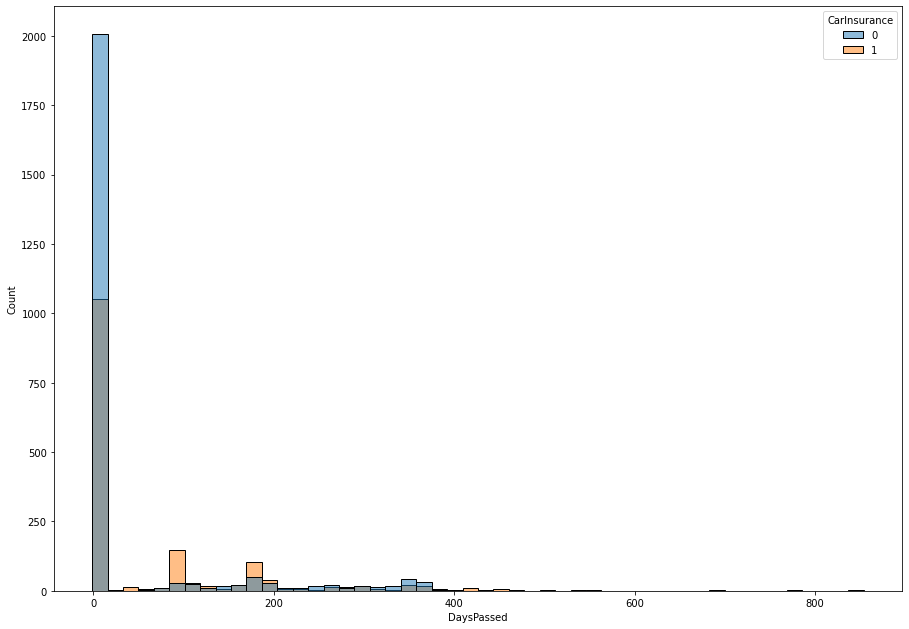

In [26]:
a4_dims = (11.7*1.3, 8.27*1.3)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(train, x="DaysPassed", hue="CarInsurance", bins=50)

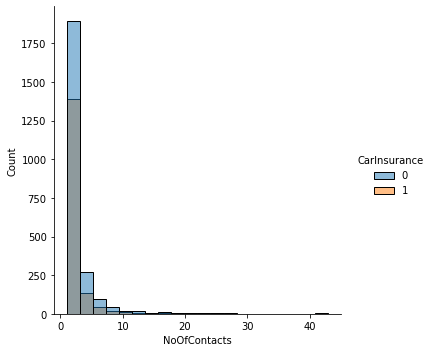

In [27]:
sns.displot(train, x="NoOfContacts", hue="CarInsurance", bins=20)

## Observations from profiling report & data explanation document

1. Each row (observation) in the data represents a customer who was contacted as part of a campaign
2. The number of observations in the training data is 4000 - from a model selection point of view this would favour simpler models (e.g. random forest) as opposed to artificial neural networks due to their complexity (# of parameters to tune vs # of observations) and need for larger datasets to avoid underfitting (large bias).
3. The `Job` feature may be suited to bucketing as it has 11 distinct values - some ideas might be to change to "working" or "not working", or to bucket Jobs using a subjective labelling according to perceived 'status'. Another option might be to combine this with the `Education` feature (there is some correlation observed in the Cramérs V correlation in the profiling report).
4. The `Education` feature has a few missing values (4.2% missing). As this is a categorical feature, it might be a good idea to fill the missing fields with some default value in order to make sure we can handle new levels/missing values at prediction time.
5. The `Default` feature is very un-balanced with only 1.5% in default.
6. The `Balance` feature has some negative values. There are also some outliers ( > 20,000 , the mean is ~1533) and the general distribution is quite long tailed (the 75th - 95th percentile delta is ~60,000) - bucketing this might be a good idea.
7. The `Communication` feature has quite a large amount of missing data (22.6%) - 